In [1]:
# Brain alignment
# take a subjects nii scan (one from 2000), call it subject_brain
# take an atlas/template brain, call it template_brain
# antsRegistration(fixed = template_brain, moving = subject_brain, typeofTransform = "Rigid",)
# save it as a subject_brain_ridigd
# should reduce the ratio between withindataset/acrossdataset similarity

In [1]:
import ants 
import numpy as np
import os
import re
from tqdm import tqdm

/mmfs1/data/liacz/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/usr/public/anaconda/2020.07-p3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/usr/public/anaconda/2020.07-p3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [8]:
#ds1747-S92, HCPaging-S725, HCPdev-S571, Ping-S750
fn = 'ds1747-S92'
indir = os.path.join(os.path.expanduser('~/Documents/Bilingualism_CVAE/data/extracted_brains'), fn)
subs = [sub.replace("_tissue.nii", "") for sub in os.listdir(indir) if sub.endswith('.nii')] #for HCP
n = len(subs)

outdir = os.path.expanduser(f'~/Documents/Bilingualism_CVAE/data/aligned_brains/{fn}')
# os.mkdir(outdir)

In [9]:
subs[66]

'sub-3925'

In [10]:
import os
temp_path = os.path.expanduser('~/Documents/Bilingualism_CVAE/misc/Atlas_brain_2mm.nii')
temp_brain = ants.image_read(temp_path) # Load in a template brain

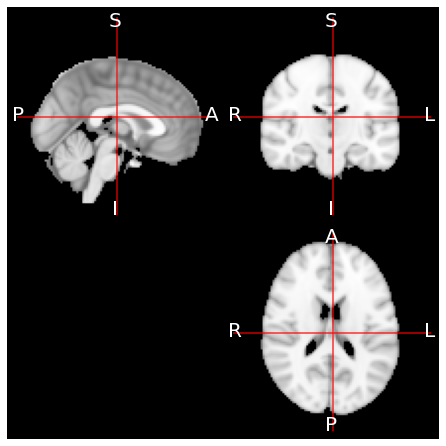

In [11]:
temp_brain.plot_ortho()

In [12]:
def rigid_trans(indir,sub,outdir,do_plot=False):
    sub_brain = ants.image_read(os.path.join(indir, '{sub}_tissue.nii'.format(sub=sub)))

    # Learn a Rigid transform to align brain to the template 
    tx = ants.registration(fixed=temp_brain,moving=sub_brain,type_of_transform='Rigid')
                                
    # Apply the rigid transform
    brain_aligned = ants.apply_transforms(fixed=temp_brain,moving=sub_brain,transformlist=tx['fwdtransforms'],interpolator='bSpline')
    ants.image_write(brain_aligned, os.path.join(outdir, sub+'_aligned.nii')) # Save extracted brain

    ## Plot
    if do_plot:
        temp_brain.plot_ortho(brain_aligned,flat=True,xyz_lines=False,orient_labels=False,overlay_cmap='hot',title='Template + after Rigid',overlay_alpha=.5)
        brain_aligned.plot_ortho(sub_brain,flat=True,xyz_lines=False,orient_labels=False,overlay_alpha=.5,overlay_cmap='hot',title='Bain after + before alignment')

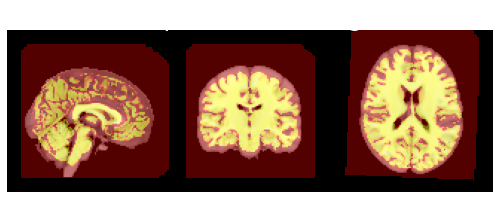

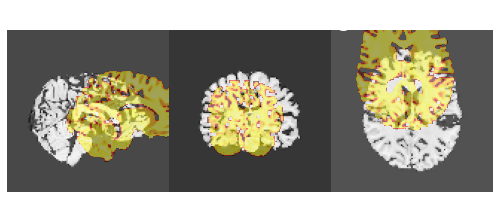

In [13]:
rigid_trans(indir,subs[66],outdir,True)

In [14]:
for sub in tqdm(subs):
    rigid_trans(indir,sub,outdir) 

100%|██████████| 92/92 [17:23<00:00, 11.35s/it]


In [ ]:
# ds001747 (n=92, monolinguals = 33, bilinguals = 59)
# ping (n=750, monolinguals = 561, bilinguals = 189, children)
# HCPaging  (n=725, monolinguals = 519, bilinguals = 206)
# HCPdev (n=652, monolinguals = 386, bilinguals = 185)

In [8]:
!pwd

/mmfs1/data/liacz/Documents/Bilingualism_CVAE/script


In [29]:
BRAIN_data_ping = np.load(os.path.expanduser('~/Documents/Bilingualism_CVAE/data/array_brains/Anat-Bilingual-64iso-Ping-S750.npz'))['data']

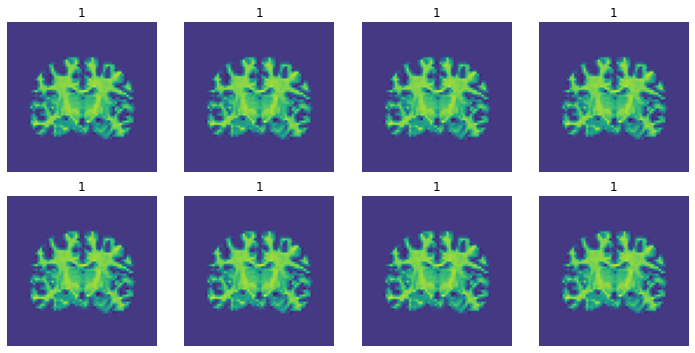

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
for i in range(8):
    plt.subplot(2,4,i+1)
#     idx = np.random.randint(0,750)
    idx = 1
    temp = BRAIN_data_ping[idx,:,32,:]
    temp  = np.rot90(temp)
    plt.imshow(temp)
    plt.title(idx)
    plt.axis('off')
plt.tight_layout()


# plt.figure(figsize=(10,5))
# for i in range(8):
#     plt.subplot(2,4,i+1)
#     idx = np.random.randint(1000,2000)
#     temp = BRAIN_data[idx,:,32,:]
#     temp  = np.rot90(temp)
#     plt.imshow(temp)
#     plt.title(idx)
#     plt.axis('off')
# plt.tight_layout()

# 832 at an angle  
# 93 angled
# 336 high in scna

# lol_flat = np.array([BRAIN_data[i,:,:,:].flatten() for i in tqdm(range(BRAIN_data.shape[0]))])
# lol_cmat = np.corrcoef(lol_flat)

In [26]:
BRAIN_data_ds1747 = np.load(os.path.expanduser('~/Documents/Bilingualism_CVAE/data/array_brains/Anat-Bilingual-64iso-ds1747-S92.npz'))['data']

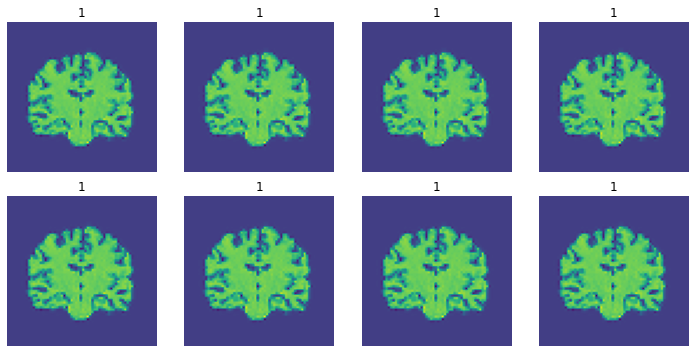

In [33]:
plt.figure(figsize=(10,5))
for i in range(8):
    plt.subplot(2,4,i+1)
    idx = 1
    temp = BRAIN_data_ds1747[idx,:,32,:]
    temp  = np.rot90(temp)
    plt.imshow(temp)
    plt.title(idx)
    plt.axis('off')
plt.tight_layout()